# DATA 604 Final Project
## Introduction to compartmental models of infectious disease outbreak
Jai Jeffryes

## Introduction
A compartmental model abstracts a system into categories representing states of interest and explores the transitions between states. A simple beginning for modeling an outbreak of infectious disease is to divide a population into three categories.

- Susceptible (S).
- Infected (I).
- Removed or Recovered (R).

See the accompanying processing flowchart and the stock-and-flow diagram.

Additional categories or flows can appear in a model to represent various characteristics of diseases, like transmissability or duration of immunity. For example, the dynamic of an incubation period preceding transmissibility of infection can be represented through addition of a compartment of Exposed (E), thus an SEIR model, or the expiration of immunity can be represented by a flow returning to Susceptible, thus SIRS.

This project implements an SIR model of infectious disease transmission. Compartmental models such as the SIR model are deterministic. They emphasize average effects and work best in large populations where infection risks are fairly homogenous. [1]

The simplest SIR model is based on several assumptions.

- Population is constant. It does not consider births and deaths.
- Immunity, once acquired upon recovery, endures forever.
- The population is well mixed. An individual has equal probability of contact with all other members of the population.

This project explores the assumption about mixing. Under normal circumstances, non-household daily contacts exceed household contacts. Lockdown measures reduce non-household contacts to a level similar to or below household contacts. This can be modeled and compared to the simple SIR model.

## Materials and methods
### Study design, settings, and data
### Simulation Sets, Parameters, Stochastic Variables, Deterministic Variables, Formulae, and Flowcharts

### To do
- Calculate $R_0$.
  - $R_0 = \frac{\beta S(0)}{\gamma}$
- Calculate critical immunization threshold.
  - $\beta (1 - q) \frac{S(0)}{\gamma} < 1 \iff q > 1 - \frac{1}{R_0}$
  - $P_c = 1 - \frac{1}{R_0}$

- Sets
  - *t*: counts the time periods.
- Parameters
  - $\beta$. The average transmission rate between an infected individual and a susceptible one.
  - $\gamma$.
  - $\rho$. The fraction of susceptible individuals who get vaccinated and assuming the vaccine is 100% effective.
- Formulae. The SIR model is the following system of quadratic Ordinary Differential Equations.
  - $\frac{dS}{dt} = -\beta S I$
  - $\frac{dI}{dt} = \beta S I - \gamma I$
  - $\frac{dR}{dt} = \gamma I$
- Dempsey
  - Parameters
    - $h_s$. Average household size.
    - $\beta_c$. The average transmission rate between an infected individual and a susceptible one in the community.
    - $\beta_h$. The average transmission rate between an infected individual and a susceptible one in a household setting.
    - $k$. Average number of contacts.
    - $C_c$. Cases who acquired infection via the community.
    - $C_h$. Cases who acquired infection via their household.
  - Formulae
    - $\frac{dS}{dt} = -\beta k I S$. Unadjusted rate of change in susceptibility.
    - $\frac{dC_c}{dt} = \beta_c (k - h_s + 1) I S$. The rate of increase in community cases amongst the $(k - h + 1)$ non-household contacts.
    - $(h_s - 1) C_c$. The maximum number of household acquired infections in a population. This can be used as a carrying capacity on the growth rate of household infections.
    - $\frac{dC_h}{dt} = \beta_h (h - 1) I S (1 - \frac{C_h}{(h_s - 1) C_c})$
    - $\frac{dS}{dt} = -\beta k I S - \beta_h (h - 1) I S (1 - \frac{C_h}{(h_s - 1) C_c})$

## Initialize environment

In [1]:
from modsim import *

## Initialize system variables

In [2]:
def make_system(beta, gamma):
    init = State(S=49999, I=1, R=0)
    init /= sum(init)
    t0 = 0
    t_end = 175
    
    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma)

## Update state variables

In [3]:
def update_func(state, t, system):
    s, i, r = state
    infected = system.beta * i * s
    recovered = system.gamma * i
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S=s, I=i, R=r)

## Simulation function

In [4]:
################ RUN SIMULATION WITH TIME FRAME #####################
def run_simulation(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init

    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)

    return frame

## Visualization function

In [5]:
def plot_results(S, I, R):
    plot(S, '--', label='Susceptible')
    plot(I, '-', label='Infected')
    plot(R, ':', label='Resistant')
    decorate(xlabel='Time (days)',
              ylabel='Fraction of population')

## Initialize variables

In [6]:
tc = 3             # time between contacts in days
tr = 4             # recovery time in days
#beta = 1 / tc      # contact rate per day
beta = 0.238
#gamma = 1 / tr     # recovery rate per day
gamma = 0.0714

## Run simulation

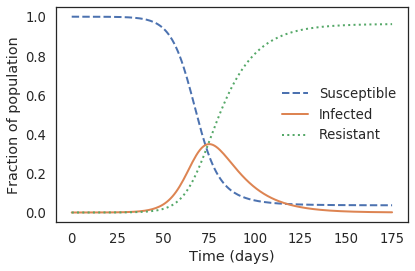

In [7]:
system = make_system(beta, gamma)
results = run_simulation(system, update_func)
plot_results(results.S, results.I, results.R)

## References
  1. [PRISM Modeling Guidelines](http://prism.edu.au/wp-content/uploads/2016/09/PRISM_Modelling-guidelines-web.pdf).

 - [Compartmental models in epidemiology (Wikipedia)](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).
 - [The SIR Model for spread of disease](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-introduction). Allen Downey's reference for his case study.
 - [NISS/ASA Tutorial on Susceptible-Infected-Recovered (SIR) Modeling](https://www.niss.org/events/nissasa-tutorial-susceptible-infected-recovered-sir-modeling). I missed the session, but this page has all the links to papers and a Shiny App. This is the most accessible model for starting out.
   - [NISS blog post](https://www.niss.org/news/susceptible-infected-recovered-sir-modeling-focus-nissasa-tutorial). This press release says a video of the session will be available on July 30th.
   - [Tutorial slides](https://www.niss.org/sites/default/files/SIR_Modeling_tutorial_ob.pdf).
   - [Code on GitHub](https://github.com/pnojai/posepi1).
   - [Shiny App](https://shiny.bcgsc.ca/posepi1/).
   - [The SIR model and the foundations of public health](http://mat.uab.cat/web/matmat/wp-content/uploads/sites/23/2020/05/v2013n03.pdf). Howard (Howie) Weiss. Very good orientation.
 - [Prism site](http://prism.edu.au). PRISM, the Centre for Research Excellence in Policy Relevant Infectious diseases Simulation and Mathematical Modelling in Australia.
   - [A User's Guide to Infectious Disease Modeling](http://prism.edu.au/wp-content/uploads/2016/09/PRISM_Modelling-guidelines-web.pdf). This manual is an excellent domain orientation.
 - Paul Dempsey's modified SIR model, exploring household and non-household contributions to case count under lockdown.
   - [Modifying SEIR models to explore the role of average household size in the era of lockdowns and social distancing](https://osf.io/sa8jk/)
   - [Paul Dempsey's model](http://covid19.dazult.com/index.html).
 - [Modeling COVID-19 Spread vs Healthcare Capacity](https://alhill.shinyapps.io/COVID19seir/). Shiny App to predict COVID-19 cases by clinical outcome. Comes with a well-documented tutorial.
   - [Code on GitHub](https://github.com/alsnhll/SEIR_COVID19).
 - [Forecasting COVID-19](https://robjhyndman.com/hyndsight/forecasting-covid19/). Rob Hyndman's assessment of model challenges. Includes a comparison of compartmental and agent-based models.
 - [Social distancing and mobility reductions have reduced COVID-19 transmission in King County, WA](https://covid.idmod.org/data/Social_distancing_mobility_reductions_reduced_COVID_Seattle.pdf). The study estimates the reproductive number from case data. It employs a distinctive SEIR model and documents the equations.
 - [COVID-19: Modeling Distributions of Incubation and Recovery Times](https://blog.iseesystems.com/stella-ithink/covid-19-modeling-distributions-of-incubation-and-recovery-times/). Stock and flow diagrams. Although the flows use inappropriate diagrammatic notation, they convey an idea. The article includes delays for state changes.
 - [Report 9: Impact of non-pharmaceutical interventions (NPIs) to reduce COVID-19 mortality and healthcare demand](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-NPI-modelling-16-03-2020.pdf). Neil Ferguson's analysis from March 2020.
